In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

from protosc.simulation import create_simulation_data

In [2]:
np.random.seed(1928374)

In [3]:
def compute_pvals(n_features=400, n_examples=400):
    X, y, selected_features, biases = create_simulation_data(n_features=n_features, n_examples=n_examples)
    ones = np.where(y==1)[0]
    zeros = np.where(y==0)[0]
    unbiased_features = np.delete(np.arange(X.shape[1]), selected_features)
    
    pvals = []

    for feature_idx in range(X.shape[1]):
        pvals.append(ttest_ind(X[y==1, feature_idx], X[y==0, feature_idx]).pvalue)
    pvals = np.array(pvals)
    y_features = np.zeros(n_features, dtype=int)
    y_features[selected_features] = 1
    return pvals, y_features

In [4]:
pvals = []
y_features = []
for _ in range(100):
    new_pval, new_y_feature = compute_pvals()
    pvals.append(new_pval)
    y_features.append(new_y_feature)

pvals = np.array(pvals).reshape(-1)
y_features = np.array(y_features).reshape(-1)

In [5]:
pval_order = np.argsort(pvals)

In [6]:
precision = np.cumsum(y_features[pval_order])/(np.arange(len(y_features))+1)

In [7]:
true_positives = np.cumsum(y_features[pval_order])
false_negatives = true_positives[-1] - true_positives
recall = true_positives/(true_positives+false_negatives)
F1 = 2*(precision*recall/(precision+recall))

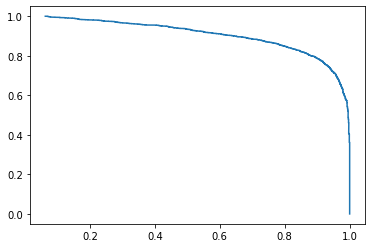

In [8]:
plt.plot(precision, recall); plt.show()

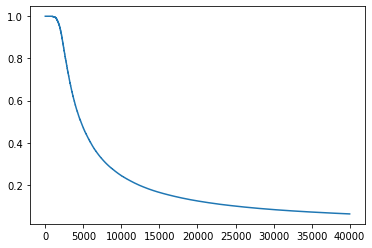

In [9]:
plt.plot(precision); plt.show()

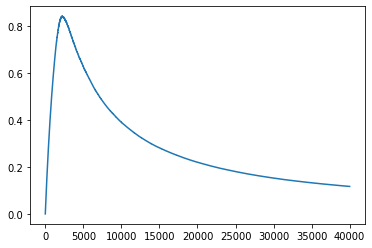

In [10]:
plt.plot(F1); plt.show()

In [11]:
np.max(F1)

0.8413938753959873

NameError: name 'np' is not defined